# MALIS Lab Session 4 - Fall 2021
## Deadline January 14

**Group : GG**

**Federico GERMINARIO, Andrea GHIGLIONE**

The aim of this lab session is to practice with decision trees for classification and then comparing different classification algorithms.

This lab is divided into 3 parts:
1. Implementing the decision tree structure
2. Test the decision tree structure
3. Compare different classification algorithms on the same dataset

Experiments should be made by groups of two students. Each group should produce a Jupyter Notebook with all their results and comments. We strongly encourage the addition of plots and visual representations to the report, bearing in mind that comments on graphical data are still necessary. Code for adding images to your notebook: ```<img src="path/to/image.png" />```.

Submit your complete notebook or an html version of it after execution.

<h1>Introduction</h1>

The first two parts of this lab session are based on the mushrooms dataset that can be found at https://archive.ics.uci.edu/ml/datasets/mushroom. Data come from *Mushroom records drawn from The Audubon Society Field Guide to North American Mushrooms* (1981) by G. H. Lincoff. This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. **The Guide clearly states that there is no simple rule for determining the edibility of a mushroom**.

You will use the following attributes to classify mushrooms between edible and poisonous.

<table>
    <tbody>
        <tr>
            <th><p>Attributes</p></th>
            <th><p>Possible Values</p></th>
            <th><p>Nb Values</p></th>
        </tr>
        <tr>
            <td><p>class</p></td>
            <td><p>edible=e,poisonous=p</p></td>
            <td><p>2</p></td>
        </tr>
        <tr>
            <td><p>cap-shape</p></td>
            <td><p>bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s</p></td>
            <td><p>6</p></td>
        </tr>
        <tr>
            <td><p>cap-surface</p></td>
            <td><p>fibrous=f,grooves=g,scaly=y,smooth=s</p></td>
            <td><p>4</p></td>
        </tr>
        <tr>
            <td><p>cap-color</p></td>
            <td><p>brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y</p></td>
            <td><p>10</p></td>
        </tr>
        <tr>
            <td><p>bruises?</p></td>
            <td><p>bruises=t,no=f</p></td>
            <td><p>2</p></td>
        </tr>
        <tr>
            <td><p>odor</p></td>
            <td><p>almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s</p></td>
            <td><p>9</p></td>
        </tr>
        <tr>
            <td><p>gill-attachment</p></td>
            <td><p>attached=a,descending=d,free=f,notched=n</p></td>
            <td><p>4</p></td>
        </tr>
        <tr>
            <td><p>gill-spacing</p></td>
            <td><p>close=c,crowded=w,distant=d</p></td>
            <td><p>3</p></td>
        </tr>
        <tr>
            <td><p>gill-size</p></td>
            <td><p>broad=b,narrow=n</p></td>
            <td><p>2</p></td>
        </tr>
        <tr>
            <td><p>gill-color</p></td>
            <td><p>black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y</p></td>
            <td><p>12</p></td>
        </tr>
        <tr>
            <td><p>stalk-shape</p></td>
            <td><p>enlarging=e,tapering=t</p></td>
            <td><p>2</p></td>
        </tr>
        <tr>
            <td><p>stalk-root</p></td>
            <td><p>bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?</p></td>
            <td><p>7</p></td>
        </tr>
        <tr>
            <td><p>stalk-surface-above-ring</p></td>
            <td><p>fibrous=f,scaly=y,silky=k,smooth=s</p></td>
            <td><p>4</p></td>
        </tr>
        <tr>
            <td><p>stalk-surface-below-ring</p></td>
            <td><p>fibrous=f,scaly=y,silky=k,smooth=s</p></td>
            <td><p>4</p></td>
        </tr>
        <tr>
            <td><p>stalk-color-above-ring</p></td>
            <td><p>brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y</p></td>
            <td><p>9</p></td>
        </tr>
        <tr>
            <td><p>stalk-color-below-ring</p></td>
            <td><p>brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y</p></td>
            <td><p>9</p></td>
        </tr>
        <tr>
            <td><p>veil-type</p></td>
            <td><p>partial=p,universal=u</p></td>
            <td><p>2</p></td>
        </tr>
        <tr>
            <td><p>veil-color</p></td>
            <td><p>brown=n,orange=o,white=w,yellow=y</p></td>
            <td><p>4</p></td>
        </tr>
        <tr>
            <td><p>ring-number</p></td>
            <td><p>none=n,one=o,two=t</p></td>
            <td><p>3</p></td>
        </tr>
        <tr>
            <td><p>ring-type</p></td>
            <td><p>cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z</p></td>
            <td><p>8</p></td>
        </tr>
        <tr>
            <td><p>spore-print-color</p></td>
            <td><p>black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y</p></td>
            <td><p>9</p></td>
        </tr>
        <tr>
            <td><p>population</p></td>
            <td><p>abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y</p></td>
            <td><p>6</p></td>
        </tr>
        <tr>
            <td><p>habitat</p></td>
            <td><p>grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d</p></td>
            <td><p>7</p></td>
        </tr>
    </tbody>
</table>

All the questions that will be asked in your decision trees will be in the form "is (ATTRIBUTE) equal to (VALUE)?". Therefore, you will have a total number of 126 possible questions. We divide the dataset into a training set of size 7124 and a test set of size 1000.

In the first part, you will have to complete missing parts of a code implementing decision trees. In the second part, you will make some experiments on the Mushrooms dataset.

First of all, please run the following cell to import relevant libraries, classes and functions.

In [1]:
print_solutions=False

import math
import random
import matplotlib.pyplot as plt
import numpy as np
from utils import Dataset, Sample, Tree, equals, import_data, accuracy
log2 = lambda x: 0 if x <= 0 else math.log(x, 2)

## Part 1: Implementing Decision Trees

In this lab, you will work with the Sample, Dataset and Tree classes. The Sample class represents a mushroom. Its attribute "is_positive" will be True when the mushroom is edible and False if it is poisonous. The Dataset class represents a set of mushrooms. The Tree class actually represents a node of a Decision Tree. We strongly advise you to have a look at these classes (in the utils.py file) to understand well how they work.

**Question 1**
    
Implement the *compute_entropy()* function and read the *split()* function of the Dataset class.

In [2]:
def compute_entropy(self):
    '''
    Computes the fraction of edible mushrooms in a dataset
        p_poisonous + p_edible = 1
    
        p_edible is the percentage of edible mushrooms
        p_poisonous is the percentage of poisonous ones
    
    With those computed probabilities the function computes the entropy of a set of mushrooms:
    entropy =  -p_edible*log2(p_edible) -p_poisonous*log2(p_poisonous) if there are samples in the dataset
    entropy = 0 if there are no samples
    
    INPUTS :
    - self which contains
        - self.len : the lenth in samples of a dataset
        - self.data : a set of length self.len and which contains elements of class Sample
            to address the elements in self.data use a loop (e.g for element in self.data : ...)
            the Sample class contains the attribute is_positive which is True if that sample is edible
            (using previous for loop do element.is_positive to see if that element is edible)
            
    
    OUTPUTS : 
    - entropy : a numerical value
    '''
    
    ###################### YOUR CODE ###################
    n_poisonous = 0
    n_edible = 0
    if self.len == 0:
        entropy = 0
    else:
        
        for el in self.data:
            if el.is_positive :
                n_edible += 1
            else:
                n_poisonous += 1

        p_poisonous = n_poisonous/self.len
        p_edible = n_edible/self.len
        entropy=-(p_edible * log2(p_edible)) - (p_poisonous*log2(p_poisonous))

        
    
        
    ################### END YOUR CODE ##################
    
    return entropy

Dataset.compute_entropy = compute_entropy

In [3]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/part1.py

In [4]:
def split(self, attribute, value, function):
    '''
    Split a dataset into two datasets (pos_set and neg_set) according to a question on a particular attribute and value
    
    Given a sample x in self.data, answer the question is function(x.attributes[attribute], value).
    If the answer is positive, x is added to pos_set, otherwise to neg_set
    '''
    if not self.len: # If the dataset is empty, we return default values
        return set(), set(), 0.
    
    pos_set=set()
    neg_set=set()
    
    for x in self.data:
        if function(x.attributes[attribute], value) == True:
            pos_set.add(x)
        else:
            neg_set.add(x)
            
    pos_set=Dataset(pos_set)
    neg_set=Dataset(neg_set)
    
    
    split_entropy = len(pos_set)/self.len*pos_set.compute_entropy()+len(neg_set)/self.len*neg_set.compute_entropy()
    return pos_set, neg_set, split_entropy

Dataset.split = split

<h1>Part 2: Detecting edible mushrooms</h1>

In this part you will run your code on the Mushrooms dataset. First of all, run the following cell to import data.

In [5]:
train_set, test_set, questions_set = import_data()
print(len(train_set), len(test_set))

7124 1000


<h4>Question 2</h4>
Run the following cell to build a decision tree of depth 1 based on the Mushrooms training dataset. What is the most informing question to ask?

In [6]:
tree = Tree(questions_set, Dataset(train_set), 1)
print(tree)

(odor equals n? Entropy gain = 0.76)
	---> True (p_positive = 96.37 %)
	---> False (p_positive = 4.03 %)



<img src="chart_q2.jpg" />

<h4>Your answer</h4>
As the tree is looking for the best attribute to split, the best attribute given by the decision tree is the odor. In particular the split is about the no presence of a odor, so the most informing question to ask is a mushroom has an odor or not. The split on the odor feature is the one that has the lowest entropy and so the split will produce the most pure children in the tree.

<h4>Question 3</h4>
Now run the following cell to build decision trees of maximum depth 0 to 8 and plot their accuracies and maximum depths. What do you notice? Explain your observations.

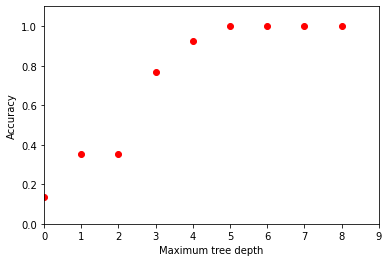

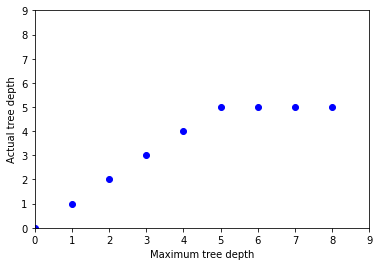

In [7]:
trees = [Tree(questions_set, Dataset(train_set), i) for i in range(9)]
accuracies = [accuracy(trees[i], test_set) for i in range(9)]
depths = [trees[i].get_size() for i in range(9)]

plt.plot(list(range(9)), accuracies, 'ro')
plt.ylabel('Accuracy')
plt.xlabel('Maximum tree depth')
plt.axis([0, 9, 0, 1.1])
plt.show()

plt.plot(list(range(9)), depths, 'bo')
plt.ylabel('Actual tree depth')
plt.xlabel('Maximum tree depth')
plt.axis([0, 9, 0, 9])
plt.show()

<h4>Your answer</h4>
From the plot we can get some interesting information.
Adding more depth seems to increase the overall accuracy, but once we reach a depth level of 5, the tree doesn't grow anymore and for that reason also accuracy remains at the same level.
This means (but we're gonna see it in the next question) that even if I let my tree grow over a greater depth, it will stop once reached the fifth level, this could be explained by the fact that all points for the subsets have the same output, or that we finished all the questions on the attributes with which making the split (this last case however is not true in our dataset)

#### Question 4

For the following you will work with a tree of depth 5. Run the following cell to build it and print it.

Which questions can actually be useful to ask to detect the edibility of a mushroom?


In [8]:
tree = Tree(questions_set, Dataset(train_set), 5)
print(tree)

(odor equals n? Entropy gain = 0.76)
	(spore-print-color equals r? Entropy gain = 0.11)
		---> False (p_positive = 0.0 %)
		(stalk-surface-below-ring equals y? Entropy gain = 0.07)
			(stalk-root equals b? Entropy gain = 0.86)
				---> True (p_positive = 100.0 %)
				---> False (p_positive = 0.0 %)
			(gill-size equals n? Entropy gain = 0.01)
				(population equals c? Entropy gain = 0.35)
					---> False (p_positive = 0.0 %)
					---> True (p_positive = 100.0 %)
				---> True (p_positive = 100.0 %)
	(bruises equals f? Entropy gain = 0.11)
		---> False (p_positive = 0.0 %)
		(stalk-root equals c? Entropy gain = 0.39)
			---> True (p_positive = 100.0 %)
			(stalk-root equals r? Entropy gain = 0.27)
				---> True (p_positive = 100.0 %)
				(habitat equals d? Entropy gain = 0.24)
					---> True (p_positive = 100.0 %)
					---> False (p_positive = 0.0 %)



<h4>Your answer</h4>
From the previous visualization we can see that at the end all the points of the subsets have a given output.
The first question is the one we have seen previously so the odor which carry the lowest value of entropy and then following we have splits on the spore-print-color and on bruises. These raw data are hard to read, for this reason we will display them in a more clear way below. All the nodes below are important questions to do in order to classify a mushroom as positive (edible) or negative (poisonous)

<b>NOTE:</b> The tree below may be slightly different from the result above, because the results can vary every run, however the splits which are done produces the same entropy gain.

<img src="chart_q4.jpg" />

In particular useful questions are:
* Is odor equal to n ? (no-odor)
* Is the spore-print-color green ?
* Are there bruises ?
* Is the stalk surface below ring scaly ?
* Is the stalk root club ?
* Is the stalk root bulbous ?
* Is the gill-size narrow ?
* Is the stalk root rooted ?
* Is the population clustered ?
* Is the habitat woods ?

<h1>Part 3: Comparison of classifiers</h1>

In this part you will compare the classification algorithms seen in this and the previous labs of MALIS course:

1. K nearest neighbors
2. Logistic regression
3. Neural Networks
4. Support Vector Machine (linear)
5. SVM with RBF kernel
6. Classification Tree

You have only to run the cells and answer the questions you can find after the code

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.simplefilter("ignore")
from sklearn.exceptions import ConvergenceWarning

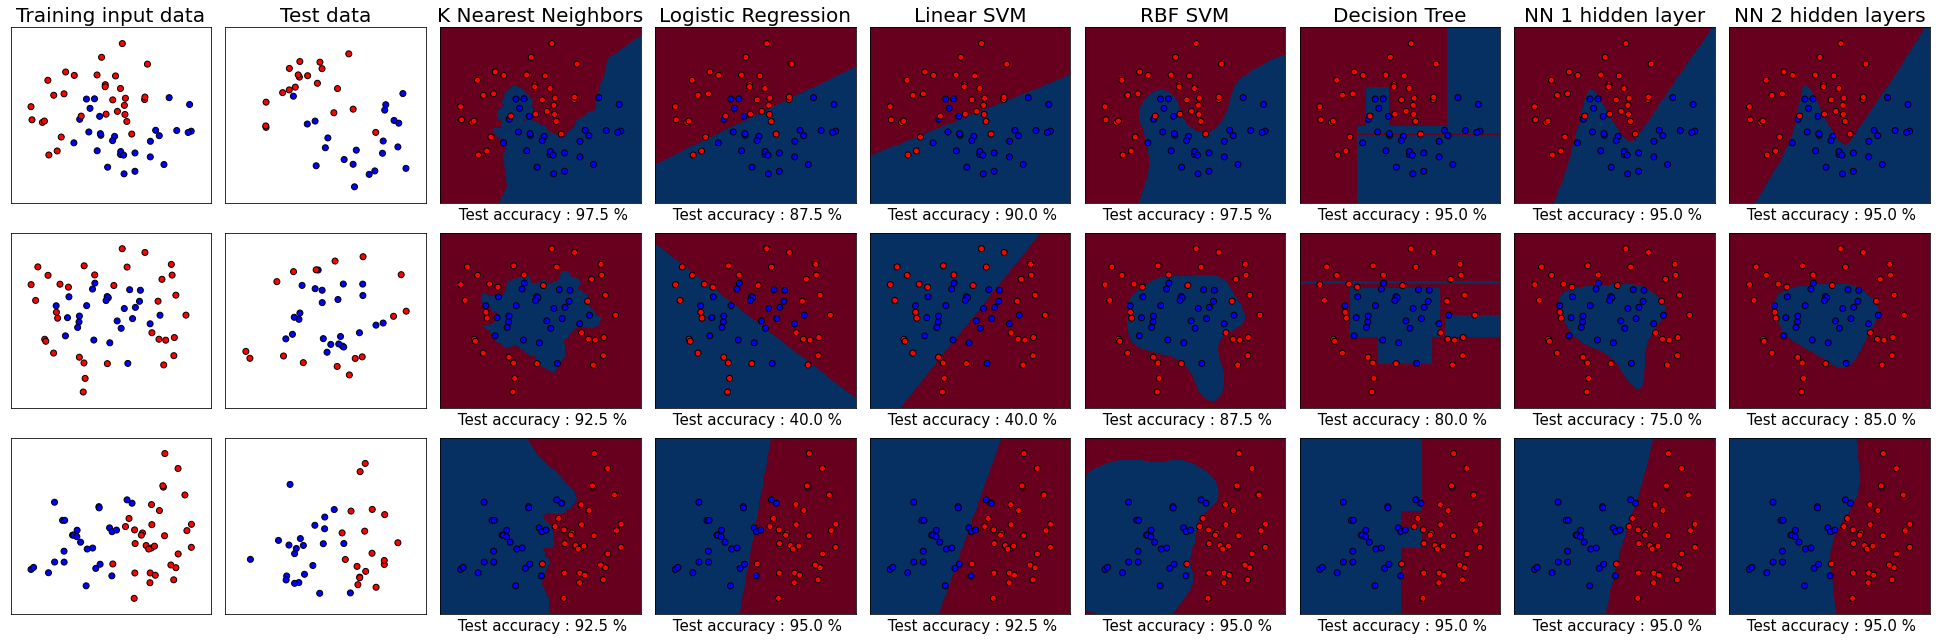

In [10]:
# The following code is note done from scratch, but it is realized using :
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

h = .02  # step size in the mesh

# classifier names and classes :
names = ["K Nearest Neighbors", "Logistic Regression", "Linear SVM", "RBF SVM", 
         "Decision Tree", "NN 1 hidden layer","NN 2 hidden layers"]
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(solver='liblinear', max_iter=400),
    SVC(kernel="linear", C=2000),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(learning_rate_init=0.05, max_iter=3000, hidden_layer_sizes=(10), batch_size=60, learning_rate='constant',  activation='logistic', solver='sgd', tol=-10.),
    MLPClassifier(learning_rate_init=0.05, max_iter=4000, hidden_layer_sizes=(10, 10), batch_size=60, learning_rate='constant', activation='logistic', solver='sgd', tol=-10.)]

# set used to train and test
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # split in train and test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    # plot the training dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Training input data",size=20)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    # plot the test dataset
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Test data",size=20)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)

        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = np.where(Z>=np.mean(Z),1,0)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])      

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.9)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        # Plot the name of the classifier in each column
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        
        # Plot the test accuracy
        ax.set_xlabel((' Test accuracy : %.1f %%' % (100*score)),size=15)
        i += 1

plt.tight_layout()
plt.show()

#### Question 5

Comment the results obtained. Use the following questions to help you.
1. Which classifiers performs poorly? In which datasets? Why?
2. Do you think some classifiers are overfitting?
    1. If yes: which ones? in which datasets? which elements allow you to say that?
    2. If no : what you should see to say that a classifier is overfitting?
3. How does changing the parameters may affect the results?
   (changing K in nearest neighbors, the hardness of the SVM, the gamma of the RBF kernel, the depth of the tree, the number of neurons of the Neural Networks)

#### Your answer
1. <b>Which classifiers performs poorly ?</b><br>
    - First dataset: The only model which don't have a test accuracy greater than 90% is the Logistic Regression (however it is not that far). It gets similar result to Linear SVM and in fact they both separates the data linearly and in this case data are not linearly separable (note: we can see how RBF SVM performs great rather than Linear SVM - we applied a transformation)<br>
    - Second dataset: As explained above, Logistic Regression and Linear SVM spearates the data linearly, and again here the data are not linearly separable (way less linearly separable than dataset 1) and so they both get very poor performances.<br>
    - Third dataset: Here the data are almost linearly separable and so all the models perform great.<br>
2. <b>Are some classifiers overfitting ?</b><br>
    - First dataset: Here all the models, except Linear SVM and Logistic Regression, produce a good data separation (on train set) , however the KNN and the Decision Tree models (and partially also NN2 model) have sharp decision boundaries which means we should pay to a possible overfitting, however the test accuracies are high (despite sharp boundaries on the train set we get high result on test; it means that the test set is very similar to the train set).
    - Second dataset: Here, excluding Linear SVM and Logistic Regression, all the models are overfitting. The decision boundaries are very sharp and in fact the test accuracies are very low with respect to the ones of training (which from the plots we can see that in these models are close to 100%)
    - Third dataset: In this dataset the models which are overfitting are: KNN, RBF SVM, Decision Tree, and partially (less than these 3 models) the NN 2 model.
    
    In general we don't want very sharp boundaries because we want our model to be able to capture the general shape of the data, being able to generalize.
3. <b>How changing the parameters may affect the result ?</b><br> 
    They determine the learning process of a model and so changing parameters will inevitably affect the result. Based on these parameters we can improve or worsen our result, with consequences on overfitting also. For example, by choosing a bigger K in the KNN we can reduce overfitting (but a K too high could cause underfitting also because our model wouldn't be able to capture enough information from the data). Another example are the number of layers in a NN; the structure of a NN deeply affect what and in which way a network will learn (examples: average pooling layer for general information, depth of the network, etc.) and also the learning rate. Decision trees are deeply affected by overfitting (and by myopia also) and we can handle it by adjusting for instance the tree depth by pruning. We could also adjust the C parameter in the SVM. Finally, also a regularization term can affect the result.